# Embeddings

https://www.youtube.com/watch?v=wSXGlvTR9UM

In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/cmc.data',header=None,names=['Age','Education','H_education',
                                                     'num_child','Religion', 'Employ',
                                                     'H_occupation','living_standard',
                                                     'Media_exposure','contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

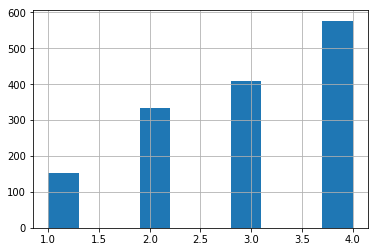

In [4]:
df.Education.hist()

In [5]:
df.shape

(1473, 10)

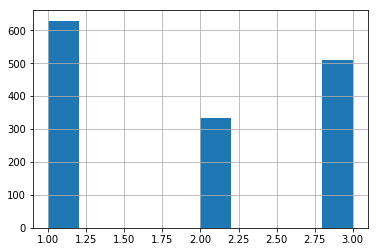

In [6]:
df.contraceptive.hist()

In [7]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [8]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx),max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

In [9]:
scaler = StandardScaler()
df[['Age','num_child']] = scaler.fit_transform(df[['Age','num_child']]) 

In [10]:
x = df[['Age','num_child','Employ','Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values - 1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values - 1
edu_one_hot = one_hot_encoding(edu)

train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv_one_hot,edu_one_hot,y,test_size=0.1, random_state=1)

In [11]:
train_x = np.hstack([train_x, train_edu, train_liv])
test_x = np.hstack([test_x, test_edu, test_liv])

In [12]:
train_x.shape

(1325, 12)

In [13]:
train_edu.shape

(1325, 4)

In [14]:
train_liv.shape

(1325, 4)

In [15]:
train_x.shape

(1325, 12)

In [16]:
model = Sequential()
model.add(Dense(input_dim=train_x.shape[1],units=12))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 1.1184 - acc: 0.3691
Epoch 2/100
 - 0s - loss: 1.0552 - acc: 0.4317
Epoch 3/100
 - 0s - loss: 1.0301 - acc: 0.4702
Epoch 4/100
 - 0s - loss: 1.0122 - acc: 0.4853
Epoch 5/100
 - 0s - loss: 0.9994 - acc: 0.4996
Epoch 6/100
 - 0s - loss: 0.9893 - acc: 0.5192
Epoch 7/100
 - 0s - loss: 0.9805 - acc: 0.5253
Epoch 8/100
 - 0s - loss: 0.9735 - acc: 0.5291
Epoch 9/100
 - 0s - loss: 0.9674 - acc: 0.5381
Epoch 10/100
 - 0s - loss: 0.9624 - acc: 0.5396
Epoch 11/100
 - 0s - loss: 0.9577 - acc: 0.5525
Epoch 12/100
 - 0s - loss: 0.9536 - acc: 0.5592
Epoch 13/100
 - 0s - loss: 0.9501 - acc: 0.5592
Epoch 14/100
 - 0s - loss: 0.9472 - acc: 0.5638
Epoch 15/100
 - 0s - loss: 0.9444 - acc: 0.5608
Epoch 16/100
 - 0s - loss: 0.9419 - acc: 0.5630
Epoch 17/100
 - 0s - loss: 0.9396 - acc: 0.5668
Epoch 18/100
 - 0s - loss: 0.9377 - acc: 0.5615
Epoch 19/100
 - 0s - loss: 0.9357 - acc: 0.5668
Epoch 20/100
 - 0s - loss: 0.9341 - acc: 0.5683
Epoch 21/100
 - 0s - loss: 0.9326 - acc: 0.5623
E

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_1 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [18]:
for w in model.get_weights():
    print(w.shape)

(12, 12)
(12,)
(12, 3)
(3,)


In [19]:
model.evaluate(test_x, test_y, batch_size=256)

148/148 [==============================] - 0s 123us/step


[0.86519604921340942, 0.59459459781646729]

In [20]:
model.predict(test_x[:10])

array([[ 0.271844  ,  0.26208067,  0.4660753 ],
       [ 0.64982235,  0.19875078,  0.15142681],
       [ 0.1893878 ,  0.23950115,  0.57111108],
       [ 0.43371147,  0.32113966,  0.24514891],
       [ 0.63295704,  0.20653607,  0.1605069 ],
       [ 0.14697671,  0.55212164,  0.30090162],
       [ 0.08474454,  0.44951931,  0.46573621],
       [ 0.73293525,  0.1353562 ,  0.13170856],
       [ 0.71772629,  0.04429471,  0.23797905],
       [ 0.62941515,  0.14667241,  0.22391239]], dtype=float32)

In [21]:
liv

array([2, 3, 3, ..., 3, 1, 3])

In [22]:
train_x, test_x, train_liv, \
test_liv, train_edu, test_edu, train_y, test_y = train_test_split(x,liv,edu,y,test_size=0.1, random_state=1)

In [23]:
# Input layer for religion
encoder_liv = Sequential()
encoder_liv.add(Embedding(liv_cats,4,input_length=1))
encoder_liv.add(Flatten())

# Input layer for religion
encoder_edu = Sequential()
encoder_edu.add(Embedding(edu_cats,4,input_length=1))
encoder_edu.add(Flatten())

# Input layer for triggers(x_b)
dense_x = Sequential()
dense_x.add(Dense(4, input_dim=x.shape[1]))

model = Sequential()
model.add(Merge([encoder_liv, encoder_edu, dense_x], mode='concat'))
# model.add(Activation('relu'))
model.add(Dense(units=12))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  app.launch_new_instance()


In [24]:
model.fit([train_liv[:,None], train_edu[:,None], train_x], train_y, epochs=100, verbose=2)

Epoch 1/100
 - 0s - loss: 1.0862 - acc: 0.4415
Epoch 2/100
 - 0s - loss: 1.0272 - acc: 0.4747
Epoch 3/100
 - 0s - loss: 1.0096 - acc: 0.4936
Epoch 4/100
 - 0s - loss: 0.9963 - acc: 0.5117
Epoch 5/100
 - 0s - loss: 0.9841 - acc: 0.5200
Epoch 6/100
 - 0s - loss: 0.9733 - acc: 0.5313
Epoch 7/100
 - 0s - loss: 0.9634 - acc: 0.5449
Epoch 8/100
 - 0s - loss: 0.9551 - acc: 0.5449
Epoch 9/100
 - 0s - loss: 0.9481 - acc: 0.5464
Epoch 10/100
 - 0s - loss: 0.9424 - acc: 0.5442
Epoch 11/100
 - 0s - loss: 0.9377 - acc: 0.5464
Epoch 12/100
 - 0s - loss: 0.9341 - acc: 0.5457
Epoch 13/100
 - 0s - loss: 0.9310 - acc: 0.5502
Epoch 14/100
 - 0s - loss: 0.9284 - acc: 0.5494
Epoch 15/100
 - 0s - loss: 0.9261 - acc: 0.5562
Epoch 16/100
 - 0s - loss: 0.9243 - acc: 0.5562
Epoch 17/100
 - 0s - loss: 0.9225 - acc: 0.5570
Epoch 18/100
 - 0s - loss: 0.9211 - acc: 0.5547
Epoch 19/100
 - 0s - loss: 0.9196 - acc: 0.5570
Epoch 20/100
 - 0s - loss: 0.9187 - acc: 0.5532
Epoch 21/100
 - 0s - loss: 0.9177 - acc: 0.5608
E

In [25]:
dense_x.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [26]:
encoder_liv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 4)              16        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4)                 0         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [28]:
a = model.get_weights()
a

[[array([[ 0.11461838, -0.34203887,  0.1574989 , -0.18827528],
         [ 0.03612387, -0.09300762,  0.14523154, -0.07043479],
         [-0.05523474,  0.03770797, -0.08984373, -0.12650369],
         [-0.26757184,  0.09603775, -0.02350858,  0.02760144]], dtype=float32)],
 [],
 [array([[-0.33447874,  0.10087483, -0.17724663,  0.37019762],
         [-0.19015916,  0.10320542, -0.17929031,  0.13965108],
         [ 0.03541155, -0.07324128, -0.02222213,  0.00450438],
         [ 0.16312642, -0.18249854,  0.1878092 , -0.15894601]], dtype=float32)],
 [],
 [array([[ 0.08907066,  0.56465811, -0.5306164 , -0.55126286],
         [ 0.72814816, -0.54345506, -1.00001395,  0.69647217],
         [-0.2183753 , -0.41058061, -0.60998988,  0.04339036],
         [ 0.1891986 , -0.27569699,  0.16744161, -0.45392898]], dtype=float32),
  array([-0.09983173, -0.08255248, -0.01086754,  0.11057617], dtype=float32)],
 [array([[ 0.28055403, -0.22324848, -0.04198486, -0.32106245, -0.46102294,
          -0.61097711,  0.3

In [29]:
model.evaluate([test_liv[:,None], test_edu[:,None], test_x],test_y, batch_size=256)

148/148 [==============================] - 0s 258us/step


[0.85121196508407593, 0.59459459781646729]

In [30]:
p = model.predict([test_liv[:,None], test_edu[:,None], test_x], batch_size=256)
p[:5]

array([[ 0.31349316,  0.24946989,  0.43703696],
       [ 0.8597433 ,  0.07680129,  0.06345554],
       [ 0.2697202 ,  0.14221881,  0.58806098],
       [ 0.39420721,  0.39873827,  0.20705448],
       [ 0.8103112 ,  0.11192607,  0.07776271]], dtype=float32)

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
merge_1 (Merge)              (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
activation_3 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [32]:
model = Sequential()
model.add(Dense(4, input_dim=train_x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(units=3))
model.add(Activation('softmax'))

model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=100)

Epoch 1/100
1325/1325 [==============================] - 0s 141us/step - loss: 0.6433 - acc: 0.6521
Epoch 2/100
1325/1325 [==============================] - 0s 44us/step - loss: 0.6283 - acc: 0.6576
Epoch 3/100
1325/1325 [==============================] - 0s 59us/step - loss: 0.6229 - acc: 0.6609
Epoch 4/100
1325/1325 [==============================] - 0s 57us/step - loss: 0.6198 - acc: 0.6611
Epoch 5/100
1325/1325 [==============================] - 0s 65us/step - loss: 0.6178 - acc: 0.6629
Epoch 6/100
1325/1325 [==============================] - 0s 60us/step - loss: 0.6163 - acc: 0.6642
Epoch 7/100
1325/1325 [==============================] - 0s 48us/step - loss: 0.6152 - acc: 0.6644
Epoch 8/100
1325/1325 [==============================] - 0s 39us/step - loss: 0.6143 - acc: 0.6647
Epoch 9/100
1325/1325 [==============================] - 0s 40us/step - loss: 0.6136 - acc: 0.6649
Epoch 10/100
1325/1325 [==============================] - 0s 39us/step - loss: 0.6130 - acc: 0.6649
Epoch 11

Epoch 83/100
1325/1325 [==============================] - 0s 63us/step - loss: 0.6048 - acc: 0.6677
Epoch 84/100
1325/1325 [==============================] - 0s 52us/step - loss: 0.6047 - acc: 0.6677
Epoch 85/100
1325/1325 [==============================] - 0s 60us/step - loss: 0.6047 - acc: 0.6677
Epoch 86/100
1325/1325 [==============================] - 0s 62us/step - loss: 0.6046 - acc: 0.6679
Epoch 87/100
1325/1325 [==============================] - 0s 75us/step - loss: 0.6046 - acc: 0.6677
Epoch 88/100
1325/1325 [==============================] - 0s 94us/step - loss: 0.6045 - acc: 0.6679
Epoch 89/100
1325/1325 [==============================] - 0s 91us/step - loss: 0.6045 - acc: 0.6677
Epoch 90/100
1325/1325 [==============================] - 0s 82us/step - loss: 0.6044 - acc: 0.6674
Epoch 91/100
1325/1325 [==============================] - 0s 75us/step - loss: 0.6044 - acc: 0.6679
Epoch 92/100
1325/1325 [==============================] - 0s 53us/step - loss: 0.6043 - acc: 0.6672


In [33]:
model.evaluate(test_x,test_y,batch_size=256)

148/148 [==============================] - 0s 325us/step


[0.59562325477600098, 0.66891878843307495]

In [34]:
# model.fit?

---